# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #requests.get function takes a URL as its first argument and returns a response object
        city_weather = requests.get(city_url)
        #convert request object into json to make it readable 
        city_weatherj = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weatherj["coord"]["lat"]
        city_lng = city_weatherj["coord"]["lon"]
        city_max_temp = city_weatherj["main"]["temp_max"]
        city_humidity = city_weatherj["main"]["humidity"]
        city_clouds = city_weatherj["clouds"]["all"]
        city_wind = city_weatherj["wind"]["speed"]
        city_country = city_weatherj["sys"]["country"]
        city_date = city_weatherj["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | fallon
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | manoel urbano
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | aranos
Processing Record 14 of Set 1 | tilichiki
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | hay river
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 20 of Set 1 | tsabong
Processing Record 21 of Set 1 | taolanaro
City not f

Processing Record 37 of Set 4 | sudak
Processing Record 38 of Set 4 | taltal
Processing Record 39 of Set 4 | boca do acre
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | tatarsk
Processing Record 43 of Set 4 | morant bay
Processing Record 44 of Set 4 | rocha
Processing Record 45 of Set 4 | pochutla
Processing Record 46 of Set 4 | karlshamn
Processing Record 47 of Set 4 | vilyuysk
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | najran
Processing Record 0 of Set 5 | ambanja
Processing Record 1 of Set 5 | le mars
Processing Record 2 of Set 5 | jutai
Processing Record 3 of Set 5 | xinzhou
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | imeni poliny osipenko
Processing Record 7 of Set 5 | naukot
Processing Record 8 of Set 5 | sinop
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | lacarak
Processing Record 11 

Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | rosario do sul
Processing Record 30 of Set 8 | rundu
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | mangrul pir
Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | turek
Processing Record 35 of Set 8 | hingorja
Processing Record 36 of Set 8 | tirlyanskiy
Processing Record 37 of Set 8 | krapina
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 41 of Set 8 | buraydah
Processing Record 42 of Set 8 | marawi
Processing Record 43 of Set 8 | porbandar
Processing Record 44 of Set 8 | catuday
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | wanning
Processing Record 47 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 8 | erzin
Processing Record 49 of Set 8 | chunoyar
Processing Record 0 of Set 9 | ts

Processing Record 16 of Set 12 | malanje
Processing Record 17 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 18 of Set 12 | olinda
Processing Record 19 of Set 12 | kawalu
Processing Record 20 of Set 12 | fukue
Processing Record 21 of Set 12 | juneau
Processing Record 22 of Set 12 | broome
Processing Record 23 of Set 12 | damaturu
Processing Record 24 of Set 12 | cayenne
Processing Record 25 of Set 12 | ipora
Processing Record 26 of Set 12 | deputatskiy
Processing Record 27 of Set 12 | luocheng
Processing Record 28 of Set 12 | yeniseysk
Processing Record 29 of Set 12 | honiara
Processing Record 30 of Set 12 | touros
Processing Record 31 of Set 12 | praia
Processing Record 32 of Set 12 | papar
Processing Record 33 of Set 12 | kandrian
Processing Record 34 of Set 12 | rungata
City not found. Skipping...
Processing Record 35 of Set 12 | port keats
Processing Record 36 of Set 12 | nechanice
Processing Record 37 of Set 12 | longlac
City not found. Skipping...
Processin

In [16]:
print(city_weather)

<Response [200]>


In [17]:
print(type(city_weather))

<class 'requests.models.Response'>


In [18]:
print(city_weatherj)

{'coord': {'lon': -39.9167, 'lat': -2.9248}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.63, 'feels_like': 26.42, 'temp_min': 25.63, 'temp_max': 25.63, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 62, 'gust': 2.57}, 'rain': {'1h': 3.16}, 'clouds': {'all': 81}, 'dt': 1680727481, 'sys': {'country': 'BR', 'sunrise': 1680684008, 'sunset': 1680727462}, 'timezone': -10800, 'id': 3393692, 'name': 'Itarema', 'cod': 200}


In [19]:
print(type(city_weatherj))

<class 'dict'>


In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,comodoro rivadavia,-45.8667,-67.5000,23.92,31,0,8.75,AR,1680726818
1,atuona,-9.8000,-139.0333,27.16,77,8,6.19,PF,1680727099
2,qaanaaq,77.4840,-69.3632,-23.42,82,76,1.02,GL,1680727100
3,puerto ayora,-0.7393,-90.3518,29.98,94,95,1.79,EC,1680727100
4,kaitangata,-46.2817,169.8464,9.40,80,51,6.11,NZ,1680727101


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv",index_label = "City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,comodoro rivadavia,-45.8667,-67.5000,23.92,31,0,8.75,AR,1680726818
1,atuona,-9.8000,-139.0333,27.16,77,8,6.19,PF,1680727099
2,qaanaaq,77.4840,-69.3632,-23.42,82,76,1.02,GL,1680727100
3,puerto ayora,-0.7393,-90.3518,29.98,94,95,1.79,EC,1680727100
4,kaitangata,-46.2817,169.8464,9.40,80,51,6.11,NZ,1680727101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

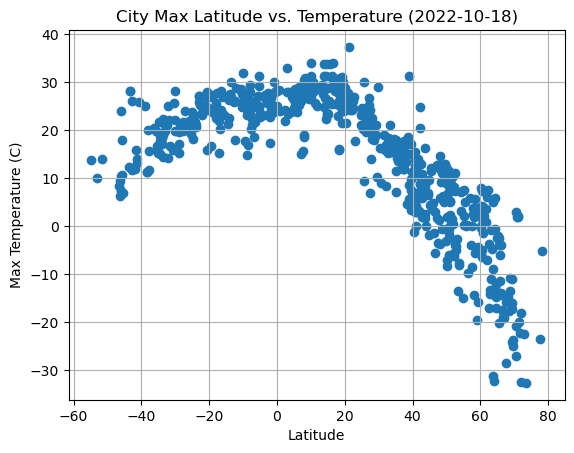

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

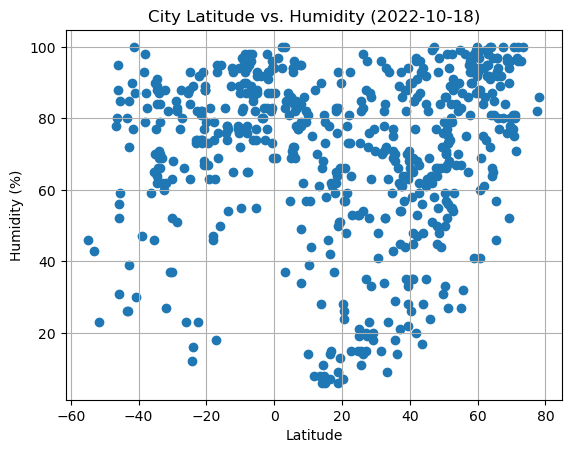

In [25]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

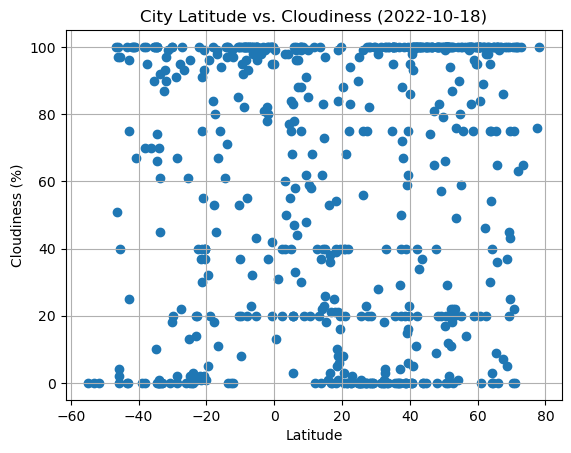

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

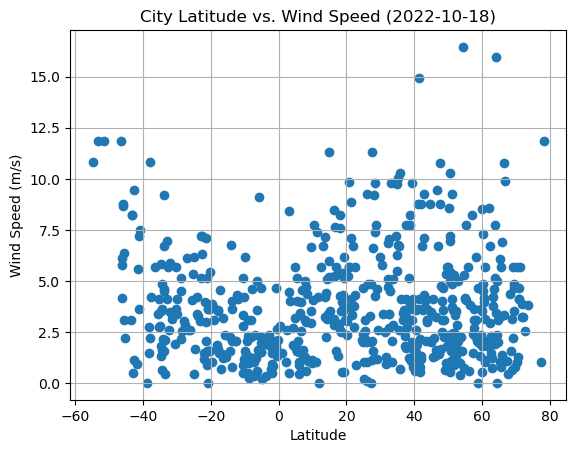

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
#within parantheses are four input arguments for linear_regression() function 
def line_regression(x_values, y_values, coordinates, y_label):
    #calculate a linear least-squares regression for two sets of measurements
    #five different variables help calculate the linear regression line
    (slope, intercept, rvalue, pvalue, intercept_stderr) = linregress(x_values, y_values)
    
    #x-axis values are multiplied by the slope intercept
    regress_values = x_values*slope+intercept
    
    #plt.scatter creates a scatter plot with the x and y values
    plt.scatter(x_values, y_values)
    #line_anno is used to create the string in which to show the plot
    line_anno = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r value is: {rvalue**2}")
    #plt.annotate() is used to add text to the plot, in other words the equation for the slope of the line
    plt.annotate(line_anno, coordinates, fontsize=12, color="red")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi = city_data_df.loc[(city_data_df["Lat"]>=0)]
northern_hemi_df = northern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaanaaq,77.4840,-69.3632,-23.42,82,76,1.02,GL,1680727100
6,aklavik,68.2191,-135.0107,-14.80,84,100,4.37,CA,1680727102
7,fallon,39.4735,-118.7774,7.47,33,75,3.09,US,1680727103
10,barrow,71.2906,-156.7887,-19.99,71,100,5.66,US,1680727105
12,tilichiki,60.4667,166.1000,-6.50,94,100,3.95,RU,1680727106


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemi_df = southern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,comodoro rivadavia,-45.8667,-67.5000,23.92,31,0,8.75,AR,1680726818
1,atuona,-9.8000,-139.0333,27.16,77,8,6.19,PF,1680727099
3,puerto ayora,-0.7393,-90.3518,29.98,94,95,1.79,EC,1680727100
4,kaitangata,-46.2817,169.8464,9.40,80,51,6.11,NZ,1680727101
5,rikitea,-23.1203,-134.9692,25.74,73,14,3.04,PF,1680727102


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.7824499845550866


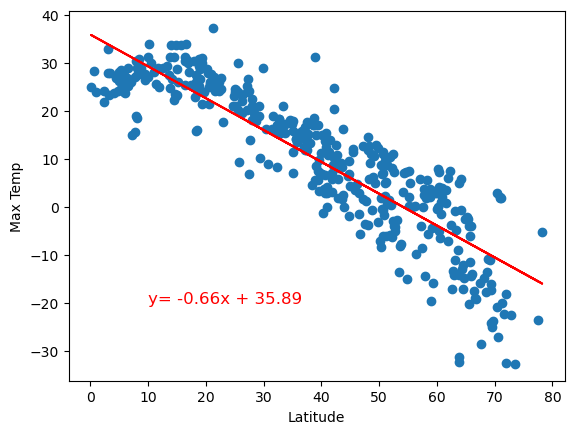

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
line_regression(x_values, y_values, (10, -20), "Max Temp")

The r value is: 0.4459801226890421


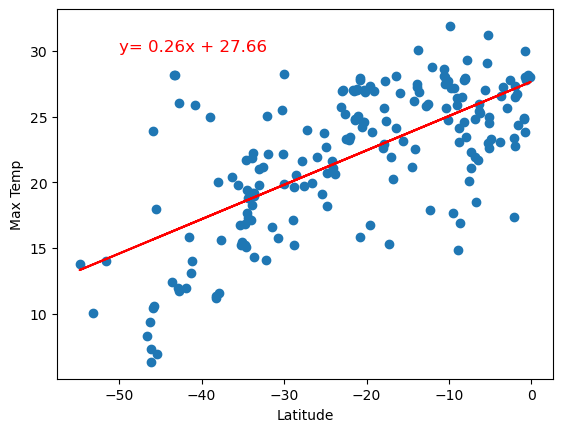

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
line_regression(x_values, y_values, (-50, 30), "Max Temp")

**Discussion about the linear relationship:** 

There is a negative correlation in the Northern Hemisphere. As the Maximum Temperature increases the Latitude decreases. 

There is a positive correlation in the Southern Hemisphere. As the Maximum Temperature increases the Latitude increases.  

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.08984429807087138


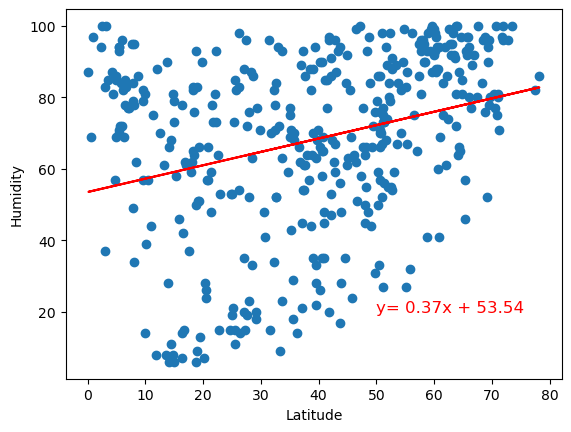

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
line_regression(x_values, y_values, (50, 20), "Humidity")

The r value is: 0.1412456247792088


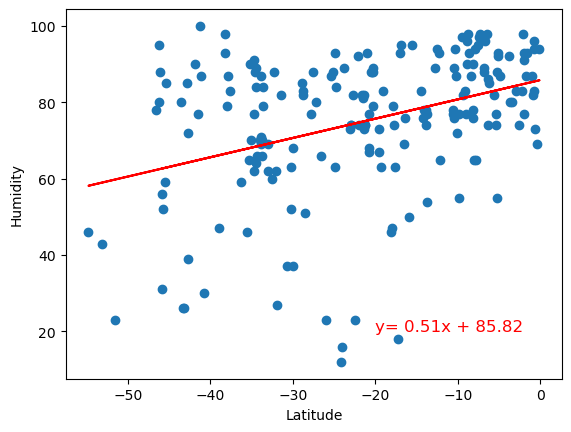

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
line_regression(x_values, y_values, (-20, 20), "Humidity")

**Discussion about the linear relationship:** 

Northern Hemisphere and Southern Hemisphere both show a slight positive correlation. As Humidity increases Latitude also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.056904857067634644


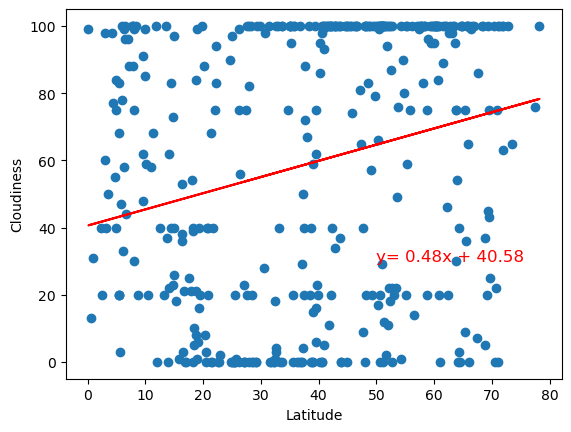

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
line_regression(x_values, y_values, (50, 30), "Cloudiness")

The r value is: 0.07945852389885066


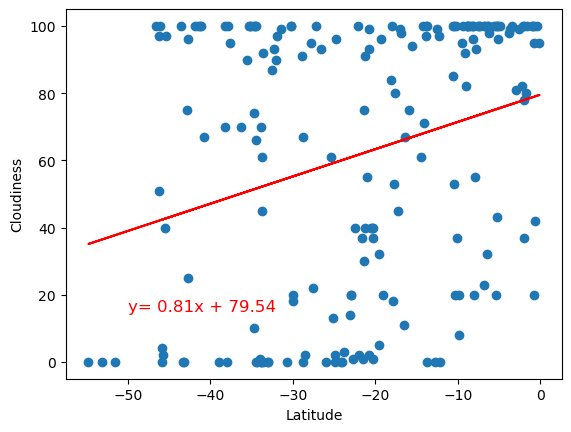

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
line_regression(x_values, y_values, (-50, 15), "Cloudiness")

**Discussion about the linear relationship:** 

There is not a strong enough correlation between cloudiness and latitude. 

Therefore, the data for both the Northern Hemisphere and Southern Hemisphere is inconclusive.  

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 7.190158920012694e-05


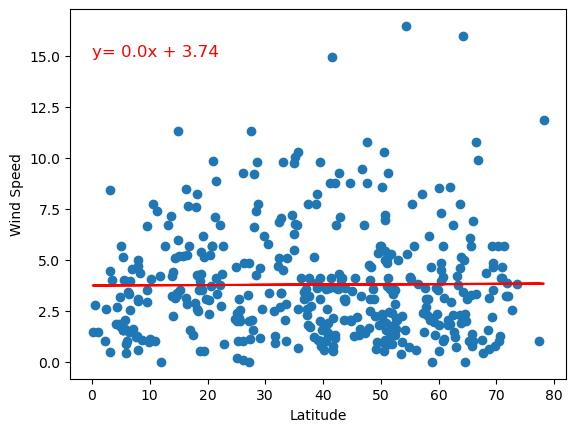

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
line_regression(x_values, y_values, (0, 15), "Wind Speed")

The r value is: 0.2681602557805423


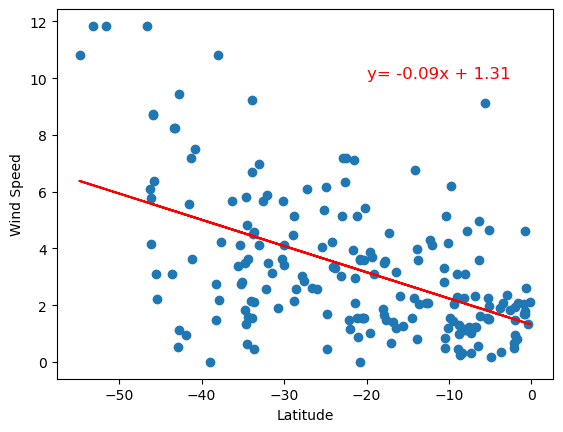

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
line_regression(x_values, y_values, (-20, 10), "Wind Speed")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is not a strong enough correlation between Wind Speed and Latitude to show a relationship. 

In the Southern Hemisphere, there is a negative correlation between Wind Speed and Latitude. As Wind Speed increases Latitude decreases.